<a href="https://colab.research.google.com/github/niharikaraghav/ExploringStudentPreferences/blob/main/Exploring_Student_Preferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


"Exploring Student Preferences: A Machine Learning Approach to Analyzing Gender-Based Professor Preferences"



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/dataset - Sheet1 (1).csv")

In [ ]:
df.head()

,Name,Gender,Preference,Comfortness,teaching effectiveness,feedbacks \n,mentorship and support,knowledge\n,\nBiasness,approachable,difficulties in communication
0,Odrija Sandilya,Female,3,3,3,1,3,3,3,3,3
1,Harmanjot,Male,3,2,1,1,1,2,2,3,1
2,Vinit Dubey,Male,3,3,3,3,3,3,3,3,3
3,Hanzla anis,Male,3,3,3,3,3,3,3,3,3
4,Rudransh Mishra,Male,1,2,1,1,1,1,1,1,1


In [ ]:
df.shape

(61, 11)

In [ ]:
df.describe()

,preferance,comfortness,effectiveness,feedbacks,mentorship and support,knowledge,biasness,approachable,communication
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1.704918,1.836066,1.868852,1.819672,1.934426,2.032787,1.737705,1.836066,1.918033
std,0.691478,0.756755,0.741067,0.741804,0.793071,0.657450,0.834698,0.734401,0.780920
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Name                            61 non-null     object
 1   Gender                          61 non-null     object
 2   Preference                      61 non-null     int64 
 3   Comfortness                     61 non-null     int64 
 4    teaching effectiveness         61 non-null     int64 
 5   feedbacks 
                     61 non-null     int64 
 6   mentorship and support          61 non-null     int64 
 7   knowledge
                      61 non-null     int64 
 8   
Biasness                       61 non-null     int64 
 9    approachable                   61 non-null     int64 
 10  difficulties in communication   61 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 5.4+ KB


In [ ]:
df['preferance'].value_counts()

preferance
2    27
1    26
3     8
Name: count, dtype: int64

DATA CLEANING

In [ ]:
df.columns

Index(['Name', 'Gender ', 'Preference ', 'Comfortness ',
       ' teaching effectiveness', 'feedbacks \n', 'mentorship and support',
       'knowledge\n', '\nBiasness ', ' approachable ',
       'difficulties in communication '],
      dtype='object')

In [ ]:
df.drop(columns=["Name"], inplace=True)

In [ ]:
df.drop(columns=['Gender '], inplace=True)

In [ ]:
df.columns

Index(['Preference ', 'Comfortness ', ' teaching effectiveness',
       'feedbacks \n', 'mentorship and support', 'knowledge\n', '\nBiasness ',
       ' approachable ', 'difficulties in communication '],
      dtype='object')

In [ ]:
df.rename(columns={'Preference ': 'preferance'}, inplace= True)

In [ ]:
df.rename(columns={'\nBiasness ': 'biasness'}, inplace= True)
df.rename(columns={'Comfortness ': 'comfortness'}, inplace= True)
df.rename(columns={' teaching effectiveness': 'effectiveness'}, inplace= True)
df.rename(columns={'feedbacks \n': 'feedbacks'}, inplace= True)
df.rename(columns={'knowledge\n': 'knowledge'}, inplace= True)
df.rename(columns={' approachable ': 'approachable'}, inplace= True)
df.rename(columns={'difficulties in communication ': 'communication'}, inplace= True)

In [99]:
df.rename(columns={'mentorship and support': 'mentorshipandsupport'}, inplace= True)

In [100]:
df.columns

Index(['preferance', 'comfortness', 'effectiveness', 'feedbacks',
       'mentorshipandsupport', 'knowledge', 'biasness', 'approachable',
       'communication'],
      dtype='object')

In [101]:
#handling the missing values
df.isnull().sum()

preferance              0
comfortness             0
effectiveness           0
feedbacks               0
mentorshipandsupport    0
knowledge               0
biasness                0
approachable            0
communication           0
dtype: int64

DATA PREPROCESSING

In [102]:
y = df["preferance"]

In [103]:
x = df[['comfortness', 'effectiveness', 'feedbacks','mentorshipandsupport', 'knowledge', 'biasness', 'approachable','communication']]

DATA VISUALIZATION

checking for correalation between different features

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

HEATMAP

In [105]:
corr = df.corr()

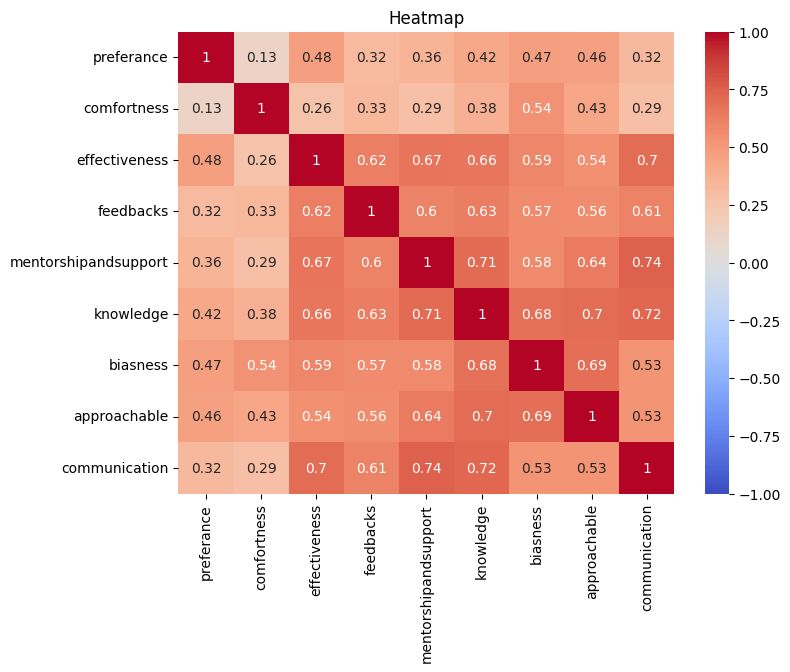

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=9598)

In [108]:
x.shape,y.shape

((61, 8), (61,))

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [110]:
model.fit(x_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(x_test)

In [112]:
y_pred

array([1.09932988, 1.22562265, 1.13662172, 1.65459836, 1.66967467,
       1.33585178, 1.71457301, 2.31338991, 1.23750947, 1.85850721,
       1.85850721, 1.52664831, 2.31338991, 1.38280449, 1.06498936,
       1.34617171, 2.31338991, 1.52468433, 2.31338991])

In [113]:
y_test

29    2
52    1
51    1
49    2
8     2
26    2
55    2
3     3
31    1
43    2
32    2
7     1
13    2
54    1
40    2
24    1
17    1
41    1
18    3
Name: preferance, dtype: int64

In [114]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

In [115]:
mean_absolute_error(y_test,y_pred)

0.4802121677462164

In [116]:
per_e = mean_absolute_percentage_error(y_test,y_pred)
per_e

0.3252564133768864

In [117]:
accuracy1 = (1-per_e)*100
accuracy1

67.47435866231136

In [118]:
mean_squared_error(y_test,y_pred)

0.325660614373833

In [119]:
mean_squared_error(y_test, y_pred)

0.325660614373833

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [121]:
y_pred = rf_classifier.predict(x_test)

In [122]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6842105263157895
Classification Report:
               precision    recall  f1-score   support

           1       0.57      1.00      0.73         8
           2       1.00      0.56      0.71         9
           3       0.00      0.00      0.00         2

    accuracy                           0.68        19
   macro avg       0.52      0.52      0.48        19
weighted avg       0.71      0.68      0.64        19

Confusion Matrix:
 [[8 0 0]
 [4 5 0]
 [2 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAPPING

In [123]:
mapping_dict = {1: 'female', 2: 'male', 3: 'any_gender'}

In [124]:
def map_predictions(predictions):
    return [mapping_dict[pred] for pred in predictions]

In [126]:
y_pred_mapped = map_predictions(y_pred)

saving and loading the model for future

In [127]:
import joblib
joblib.dump(model, "trained_model.pkl")

['trained_model.pkl']

In [128]:
import numpy as np

In [130]:
new_data= pd.DataFrame({
    'comfortness' : [2],
    'effectiveness' : [3],
    'feedbacks' : [2],
    'mentorshipandsupport' : [2],
    'knowledge' : [1],
    'biasness' : [1],
    'approachable' : [1],
    'communication' : [1],
})
new_prediction = rf_classifier.predict(new_data)
new_prediction_mapped = map_predictions(new_prediction)
print("according to inputs, preffered professor should be", new_prediction_mapped)

according to inputs, preffered professor should be ['male']


In [137]:
def get_user_input():
    print("Please enter the following details \n Enter 1 for female, 2 for male, 3 for any professor \n :")
    comfortness = float(input("who are you more comfortable working with?: "))
    effectiveness = float(input("which is more effective teaching styles, who are you more influenced by?: "))
    feedbacks = float(input("Do you feel that female or male professors are better at providing feedback on assignments or exams?: "))
    mentorshipandsupport = float(input("do you prefer seeking support from a female male or any gender professor?: "))
    knowledge = float(input("Do you think male or female teachers have better knowledge?  "))
    biasness = float(input("Do you believe that gender bias exists in academia? If yes, do you perceive bias towards female, male, or none"))
    approachable = float(input("Do you feel that male, female, or any gender of professors are more approachable for seeking help outside of class?"))
    communication = float(input("Have you ever experienced difficulties in communication with a professor based on their gender? "))

    return np.array([[comfortness, effectiveness, feedbacks, mentorshipandsupport, knowledge, biasness, approachable, communication]])

user_input = get_user_input()
new_prediction = rf_classifier.predict(new_data)
new_prediction_mapped = map_predictions(new_prediction)
print("according to inputs, preffered professor should be", new_prediction_mapped)


Please enter the following details 
 Enter 1 for female, 2 for male, 3 for any professor 
 :
who are you more comfortable working with?: 1
which is more effective teaching styles, who are you more influenced by?: 1
Do you feel that female or male professors are better at providing feedback on assignments or exams?: 1
do you prefer seeking support from a female male or any gender professor?: 1
Do you think male or female teachers have better knowledge?  1
Do you believe that gender bias exists in academia? If yes, do you perceive bias towards female, male, or none1
Do you feel that male, female, or any gender of professors are more approachable for seeking help outside of class?1
Have you ever experienced difficulties in communication with a professor based on their gender? 1
according to inputs, preffered professor should be ['male']
